In [123]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import matplotlib.pyplot as plt

EL objetivo de este programa es modelar con regresión lineal el precio del servicio medico con las variables de edad, esxo, hijos, etc. En otras palabras buscamos los coeficientes a_{n} tal que y=a_{1}x_{1} + .....+ a_{n}x_{n}.

In [94]:
datos = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [95]:
datos.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Es conveniente observar unas graficas de nuestros datos

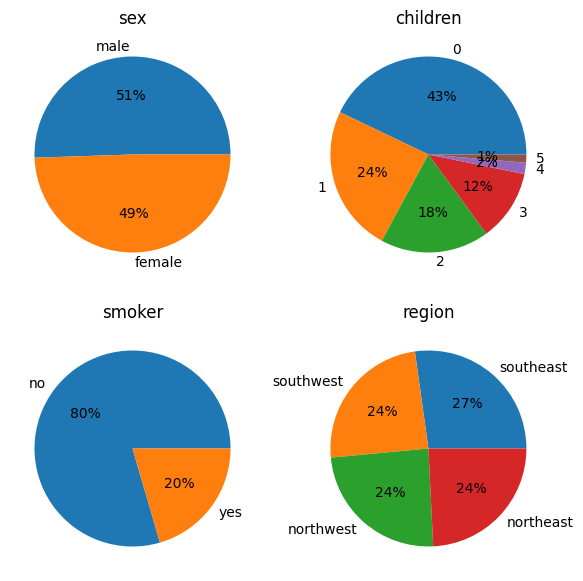

In [122]:
a = 0
cat = []
con = []
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
for i in datos.columns:
    if datos[i].nunique() < 10:
        p = a // 2
        q = a % 2
        df1 = datos[i].value_counts()
        ax[p,q].pie(df1, labels = df1.index, autopct='%.0f%%')
        ax[p,q].set_title(i)
        a = a+1
        cat.append(i)
    else:
        con.append(i)
plt.show()

Nos enfocamos en categorizar las variables que no contienen numeros

In [96]:
dummy_sex = pd.get_dummies(datos["sex"], prefix = "sex")
dummy_Zona = pd.get_dummies(datos["region"], prefix = "region")
dummy_smoker = pd.get_dummies(datos["smoker"], prefix = "smoker")

In [97]:
column_names = datos.columns.values.tolist()
column_names

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [98]:
datos_2 = datos[column_names].join(dummy_sex)
column_names2 = datos_2.columns.values.tolist()

In [99]:
datos_2= datos_2[column_names2].join(dummy_Zona)
column_names2 = datos_2.columns.values.tolist()

In [100]:
datos_2= datos_2[column_names2].join(dummy_smoker)

In [101]:
datos_2.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0,0,1,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0,0,1,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0,0,1,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0,1,0,0,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0,1,0,0,1,0


In [102]:
columnas=["age", "bmi" ,"children","sex_female" ,"sex_male"  ,"region_northeast", "region_northwest", "region_southeast", "region_southwest","smoker_no", "smoker_yes" ]

In [103]:
X=datos_2[columnas]
Y=datos_2["charges"]

Procedemos a ver cuales son las variables que nos conviene tener en la regresión

In [104]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X,Y)

In [105]:
selector.ranking_

array([1, 7, 1, 3, 1, 2, 6, 5, 4, 1, 1])

In [106]:
x_predic = datos_2[["age" ,"children" ,"sex_male","smoker_no", "smoker_yes"]]

In [107]:
lm = LinearRegression()
lm.fit(x_predic, Y)

LinearRegression()

In [108]:
lm.coef_, lm.intercept_

(array([   273.13177854,    486.20915563,     61.32237177, -11918.43073722,
         11918.43073722]),
 9035.43719460973)

In [109]:
lm.score(x_predic, Y)

0.7237495964252298

In [137]:
y_predic=(lm.predict(x_predic))

In [145]:
np.mean((np.abs(y_predic - datos_2["charges"]) / datos_2["charges"] )  *100)

32.06055844982911


podemos ver que el promedio de los errores porcentuales es de 32.06%, lo cual nos indidca que es una aproximación deficiente y eso ya lo veiamos desde lm.score con un valor de 0.7237, lo cual nos sugiere que lo podemos modelar de otra forma